In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

**Dataset**

In [ ]:
path = '/content/drive/MyDrive/Breast_cancer_data.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Dropping 'id' and 'unnamed' column**

In [ ]:
data.drop(["id","Unnamed: 32"], inplace=True, axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 31)

The dataset has 569 rows and 31 columns. 30 features and 1 target.

**Missing Values**

In [ ]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

All features have numerical values and targert(diagnosis) has categorical values.

**Statistical Description**

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Target [Diagnosis] Variable**

In [ ]:
malignant_count = data['diagnosis'].value_counts().get('M')
benign_count = data['diagnosis'].value_counts().get('B')

print('Number of Malignant cases:', malignant_count)
print('Number of Benign cases:', benign_count)

Number of Malignant cases: 212
Number of Benign cases: 357


<Axes: xlabel='diagnosis', ylabel='count'>

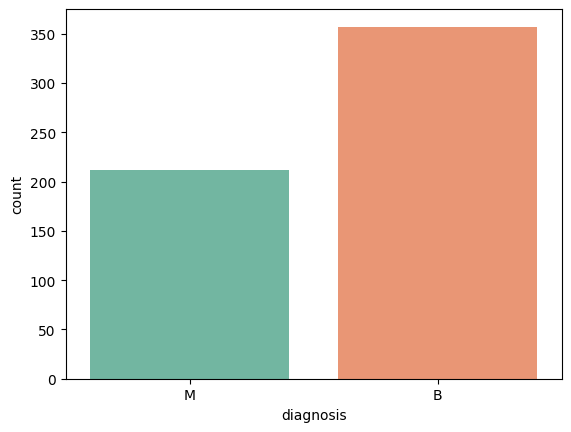

In [ ]:
sns.countplot(data=data, x='diagnosis', palette='Set2')

**Renaming**

Benign(B) --> 0

Malignant(M) --> 1

In [ ]:
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

In [ ]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


We can see that for malignant(1) cases the mean of features is slightly greater than mean of features for benign(0) cases. It will be helpful for our models.

**Data Copy**

In [ ]:
df = data.copy()

In [ ]:
x_column = df.drop(['diagnosis'], axis=1).columns
y_column = df.columns[0]

**Features Distribution w.r.t Diagnosis (M, B)**

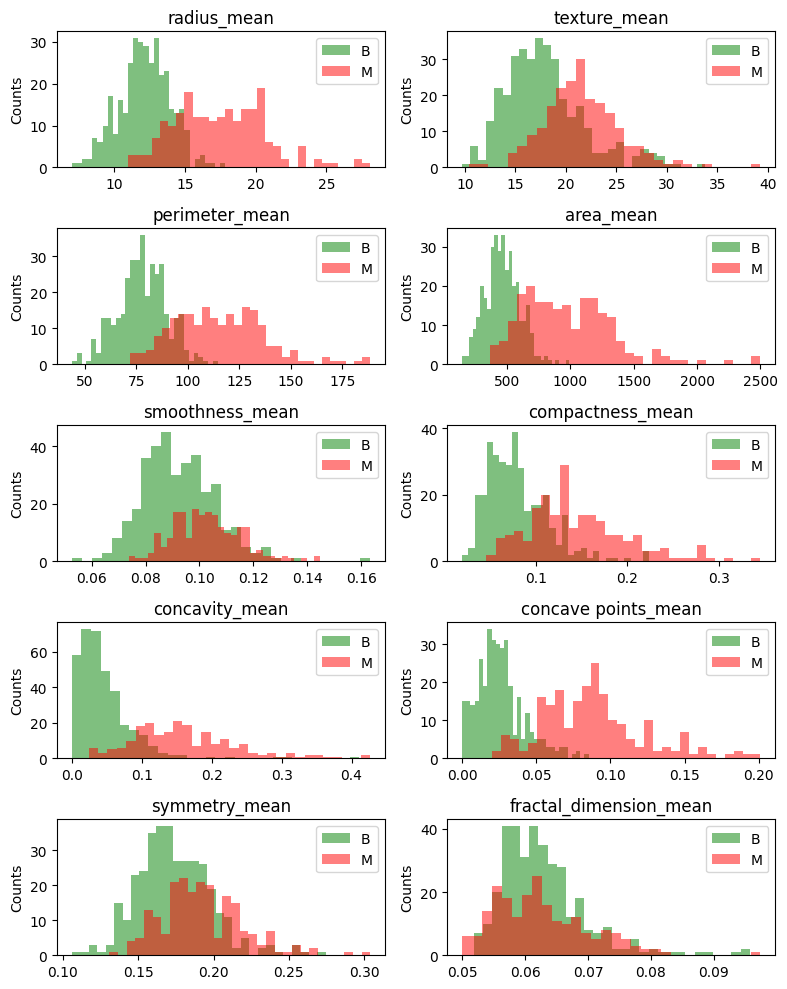

In [ ]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(data.columns[1:11]):

    plt.subplot(5, 2, i+1).set_title(col)

    x_col = data[x_column[i]].values
    y_col = data[y_column].values

    plt.hist(x_col[y_col == 0], label='B', color='green', alpha=0.5,  bins=30)
    plt.hist(x_col[y_col == 1], label='M', color='red', alpha=0.5,  bins=30)

    plt.ylabel('Counts')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

In the plots of the features radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean, the medians of the Malignant and Benign categories are distinctly separated.

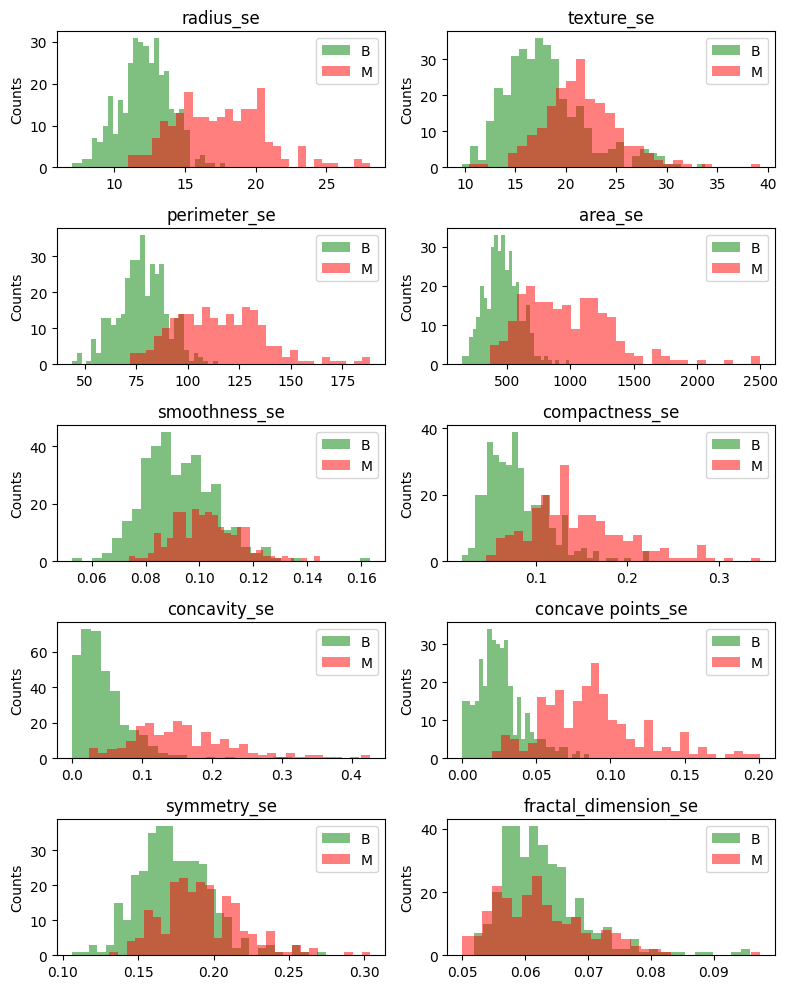

In [ ]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(data.columns[11:21]):

    plt.subplot(5, 2, i+1).set_title(col)

    x_col = data[x_column[i]].values
    y_col = data[y_column].values

    plt.hist(x_col[y_col == 0], label='B', color='green', alpha=0.5,  bins=30)
    plt.hist(x_col[y_col == 1], label='M', color='red', alpha=0.5,  bins=30)

    plt.ylabel('Counts')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

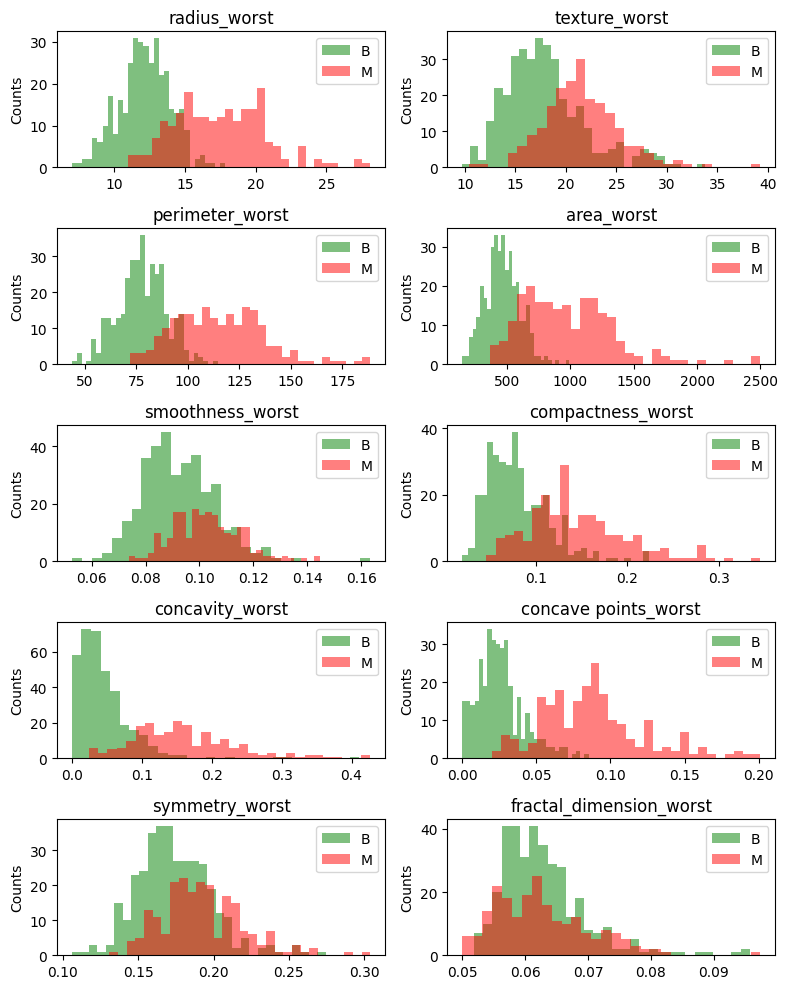

In [ ]:
plt.figure(figsize=(8, 10))

for i, col in enumerate(data.columns[21:]):

    plt.subplot(5, 2, i+1).set_title(col)

    x_col = data[x_column[i]].values
    y_col = data[y_column].values

    plt.hist(x_col[y_col == 0], label='B', color='green', alpha=0.5,  bins=30)
    plt.hist(x_col[y_col == 1], label='M', color='red', alpha=0.5,  bins=30)

    plt.ylabel('Counts')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

Some of the plots above are similar but we are not sure. If the features are correlated with each other, we can drop one of them.

**Separating Features and Target Variable**

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

**Visualizing Feature Spread with Swarm Plot**

In [ ]:
def visualize_spread(X: pd.DataFrame, y: pd.Series, start: int, stop: int):

    sns.set(style="whitegrid", palette="Set1")
    data_standardized = (X - X.mean()) / X.std()
    data_combined = pd.concat([y, data_standardized.iloc[:, start:stop]], axis=1)
    data_melted = pd.melt(data_combined, id_vars="diagnosis", var_name="features", value_name="value")

    plt.figure(figsize=(10, 10))
    sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_melted)

    plt.xticks(rotation=90)
    plt.show()

Mean Features

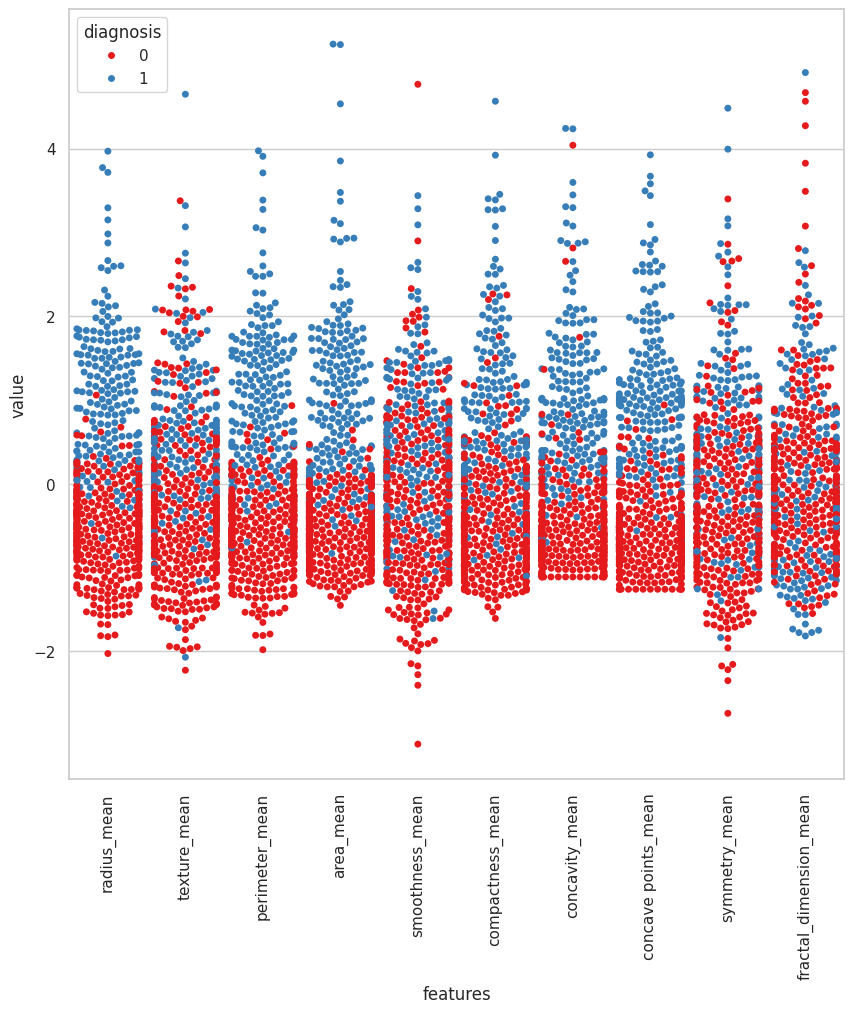

In [ ]:
visualize_spread(X,y,0,10)

Each dot represents one cancer patient. Red represents benign patients, while blue shows malignant patients.

The radius_mean and concave_points_mean in the above swarm plot appear to be primarily split between malignant and benign. On the other hand, smoothness_mean,symmetry_mean, fractal_dimension_mean, and texture_mean in the above swarm plot looks like malignant and benign are mixed so it is hard to classify while using these feature.

Squared Error (SE) features

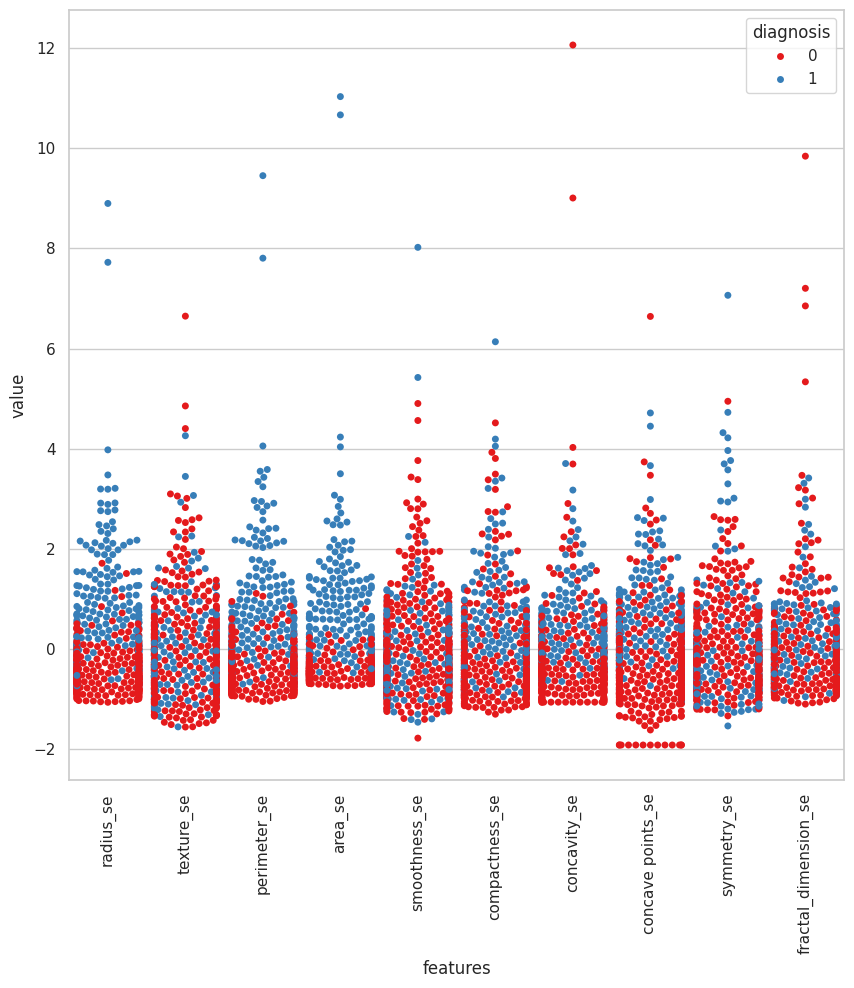

In [ ]:
visualize_spread(X,y,10,20)

In the swarm plot above, area_se appears to be primarily split into malignant and benign.

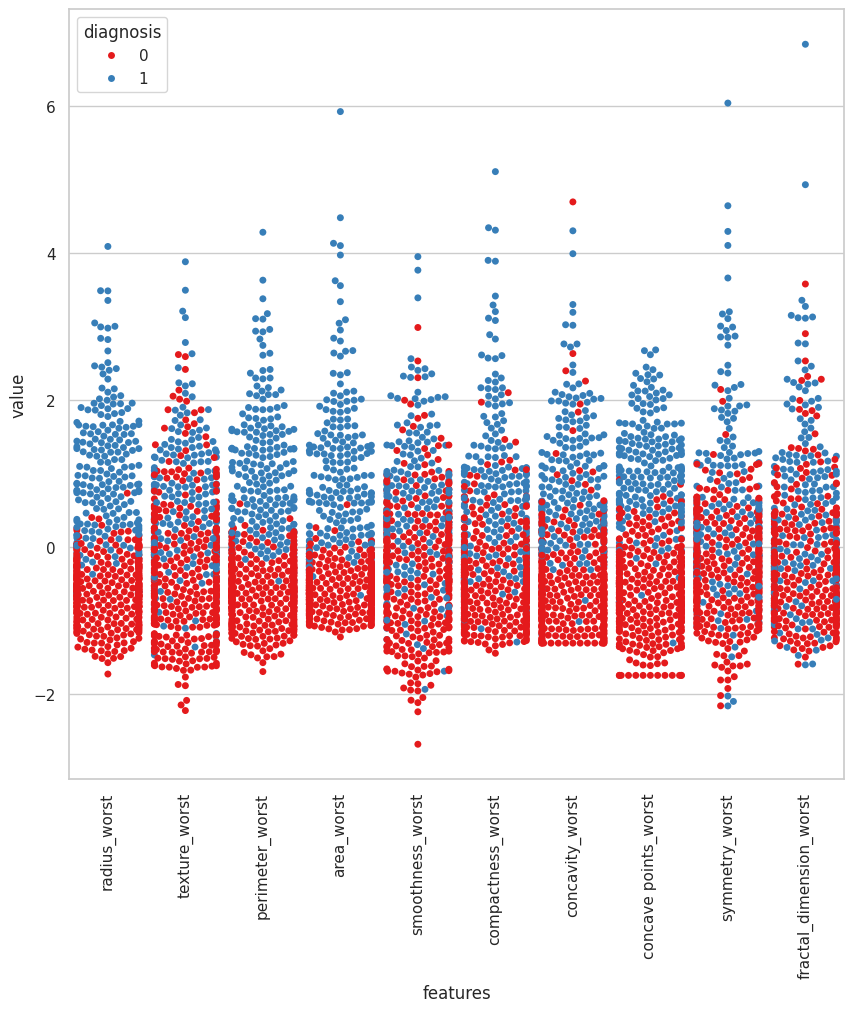

In [ ]:
visualize_spread(X,y,20,30)

The radius_worst and area_worst in the above swarm plot appear to be primarily split between malignant and benign.

Pair of variables of (concavity_mean and concave point_mean), (concavity_se and concave point_se), and (concavity_worst, and concave point_worst) looks like similar like they are correlated.

**Correlation Heatmap**

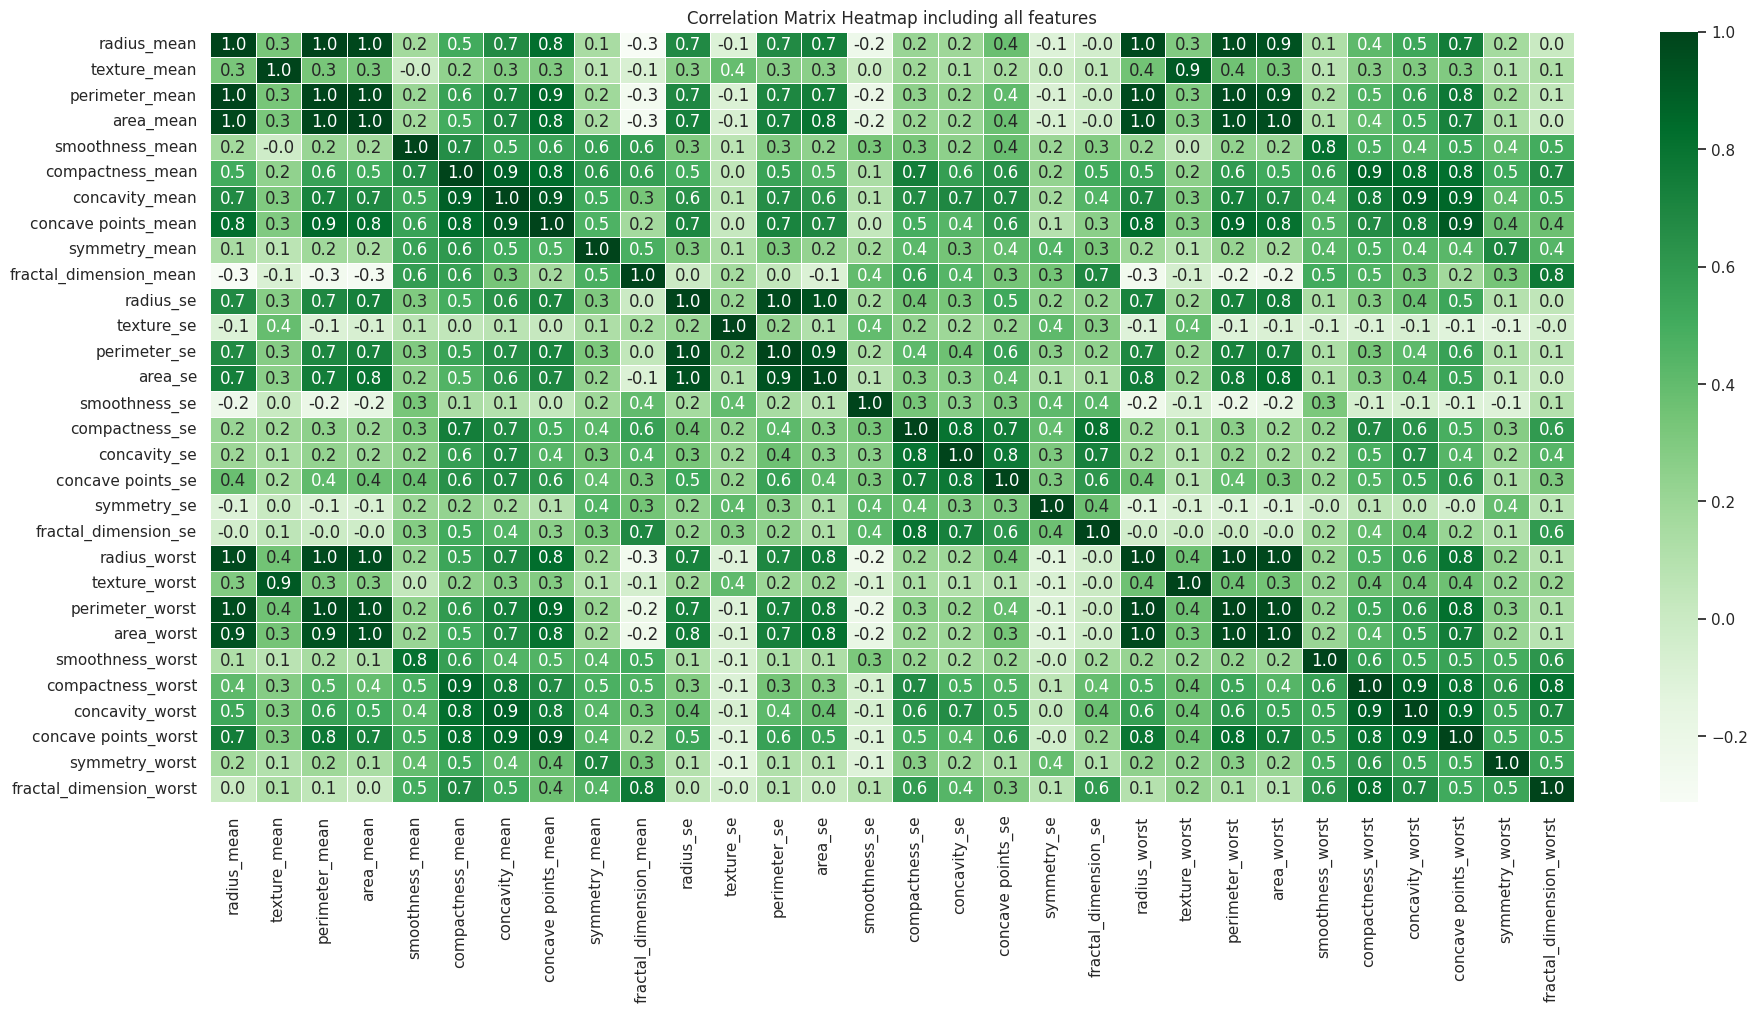

In [ ]:
corr_matrix = X.corr()

fig, ax = plt.subplots(figsize=(22, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".1f", cmap="Greens", ax=ax)
ax.set_title("Correlation Matrix Heatmap including all features")

plt.show()

**From Correlation heatmap, we can see:**

*   radius_mean, perimeter_mean and area_mean are highly correlated with each other. So, we can choose one of them.
*   The mean values of compactness, concavity, and concave points are all also correlated, we can select one of them.


*   Similarly, radius_se, perimeter_se and area_se are correlated and we can use one of them. radius_worst, perimeter_worst and area_worst are correlated so we can use one of them.
*   Compactness_worst, concavity_worst, and concave points_worst too so we can use one of them. Also Compactness_se, concavity_se and concave points_se so we can use one them.

*   texture_mean and texture_worst are correlated and we can use one of them. area_worst and area_mean are correlated, we can use one of them.


**Feature Selection**

Choosing one from the features that are correlated

In [ ]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
             'radius_se','perimeter_se','compactness_se','concave points_se','radius_worst','perimeter_worst',
             'compactness_worst','concavity_worst','texture_worst','area_worst']

In [ ]:
X_1 = X.drop(drop_list, axis = 1 )

Correlation Matrix Heatmap after dropping correlated features

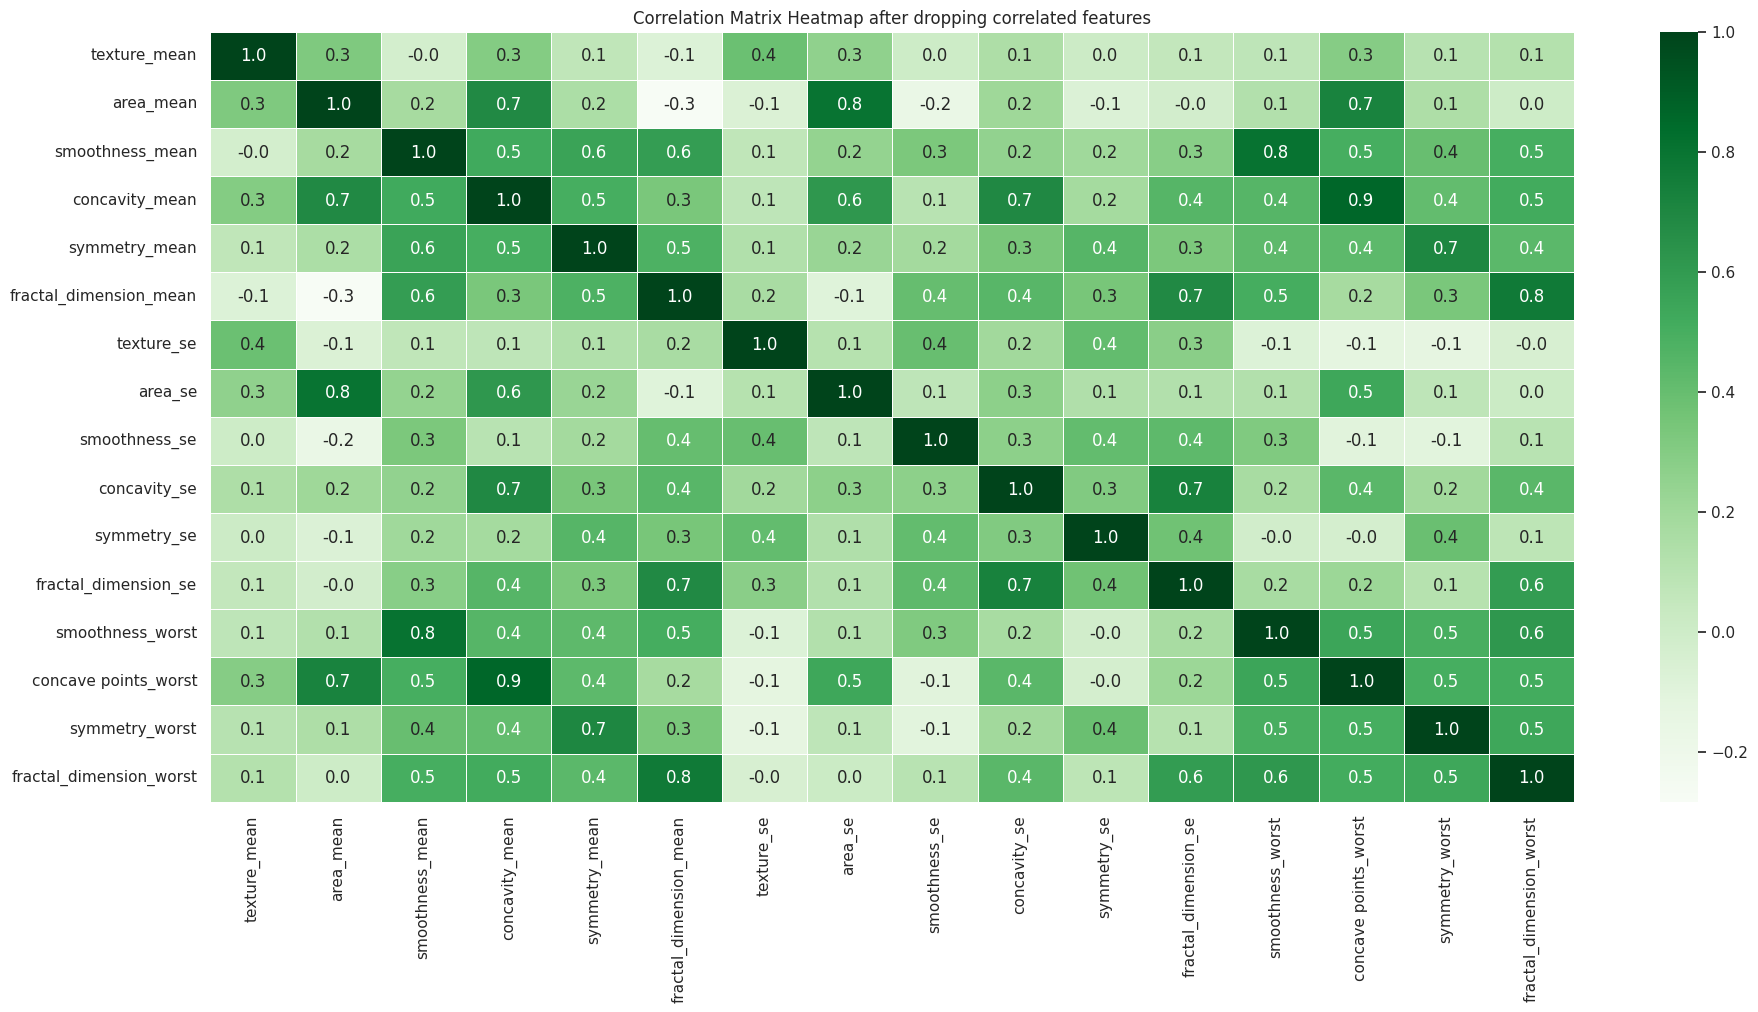

In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.heatmap(X_1.corr(), annot=True, linewidths=0.5, fmt=".1f", cmap="Greens", ax=ax)
ax.set_title("Correlation Matrix Heatmap after dropping correlated features")

plt.show()

**Splitting the dataset**

In [ ]:
X_train, X_test, y_train ,y_test =train_test_split(X_1,y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 16), (114, 16), (455,), (114,))

**Scaling Data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVM**

In [ ]:
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [ ]:
svc = SVC(C=20, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=20, gamma=0.01, probability=True)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.9824561403508771


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



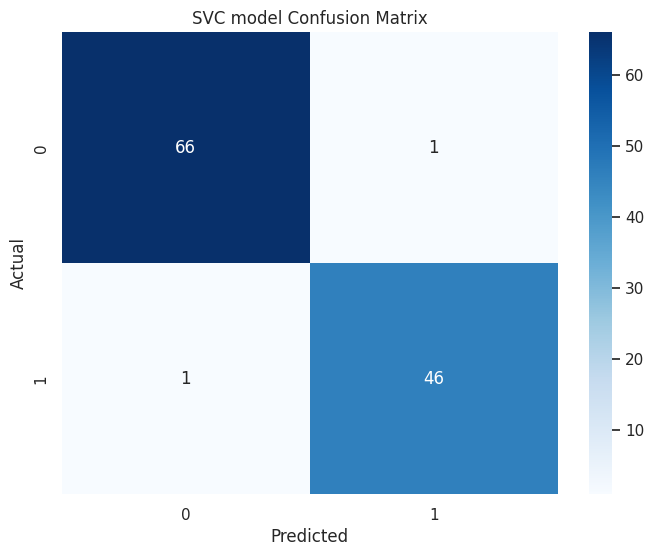

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC model Confusion Matrix')
plt.show()

**KNN**

In [ ]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 4, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 50]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 4, 5, 10],
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=10,
    n_neighbors=5,
    weights='uniform'
)

knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.9298245614035088


In [ ]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[65  2]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.95      0.87      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



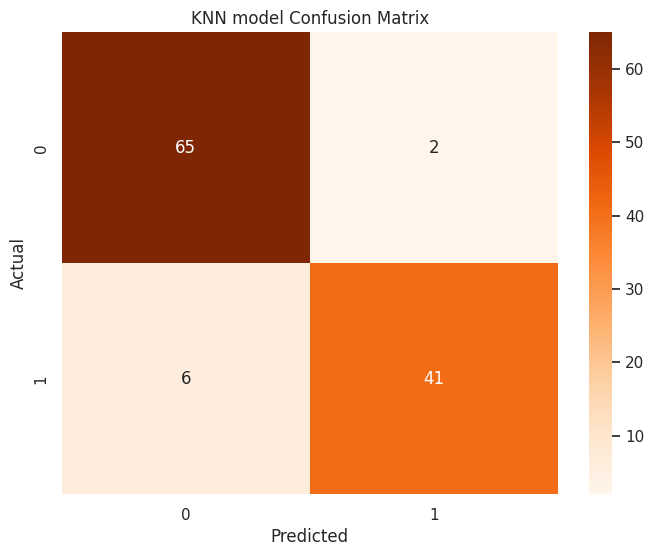

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN model Confusion Matrix')
plt.show()

**Logistic Regression**

In [ ]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log = log_r.predict(X_test)

In [ ]:
log_acc = accuracy_score(y_test, log_r.predict(X_test))
print(log_acc)

0.9649122807017544


In [ ]:
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**Naive Bayes**

In [ ]:
naive_b = GaussianNB()
naive_b.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = naive_b.predict(X_test)

In [ ]:
nb_acc = accuracy_score(y_test, naive_b.predict(X_test))
print(nb_acc)

0.9122807017543859


In [ ]:
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[63  4]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



**Models Accuracy Comparison**

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Naive Bayes', 'Logistic Regression'],
    'Score': [100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(nb_acc,4), 100*round(log_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,SVM,98.25
3,Logistic Regression,96.49
0,KNN,92.98
2,Naive Bayes,91.23
